<a href="https://colab.research.google.com/github/karnali/covid_19_colab/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Reading the dataset https://github.com/CSSEGISandData/2019-nCoV
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-05-2020.csv')
                 

In [9]:
# Let's look at the various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 8 columns):
Province/State    91 non-null object
Country/Region    173 non-null object
Last Update       173 non-null object
Confirmed         173 non-null int64
Deaths            173 non-null int64
Recovered         173 non-null int64
Latitude          173 non-null float64
Longitude         173 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 10.9+ KB


In [10]:
df.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,173.000000,173.000000,173.000000,173.000000,173.000000
mean,565.815029,19.352601,310.965318,31.551852,16.022606
std,5155.797934,220.894659,3088.222204,21.219194,88.476001
min,0.000000,0.000000,0.000000,-41.454500,-123.869500
25%,1.000000,0.000000,0.000000,27.610400,-73.794900
50%,5.000000,0.000000,0.000000,36.000000,19.503300
75%,75.000000,1.000000,9.000000,43.073100,106.874800
max,67466.000000,2902.000000,40592.000000,64.963100,174.886000


In [11]:
# Countries affected
countries = df['Country/Region'].unique().tolist()
# print(countries)

print("\nTotal countries affected by virus: ",len(countries))


Total countries affected by virus:  90


In [12]:
#Combining China and Mainland China cases
df['Country/Region'].replace({'Mainland China':'China'},inplace=True)
countries = df['Country/Region'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))



['China', 'South Korea', 'Italy', 'Iran', 'Others', 'Germany', 'France', 'Japan', 'Spain', 'Singapore', 'UK', 'Switzerland', 'Hong Kong', 'Sweden', 'Norway', 'Netherlands', 'Kuwait', 'Bahrain', 'US', 'Belgium', 'Malaysia', 'Thailand', 'Taiwan', 'Austria', 'Iraq', 'Iceland', 'Greece', 'India', 'United Arab Emirates', 'Australia', 'Canada', 'San Marino', 'Israel', 'Lebanon', 'Oman', 'Vietnam', 'Ecuador', 'Algeria', 'Czech Republic', 'Finland', 'Croatia', 'Denmark', 'Macau', 'Portugal', 'Qatar', 'Azerbaijan', 'Belarus', 'Ireland', 'Romania', 'Mexico', 'Pakistan', 'Saudi Arabia', 'Brazil', 'Chile', 'Georgia', 'Palestine', 'Russia', 'Senegal', 'Egypt', 'Estonia', 'New Zealand', 'Philippines', 'Saint Barthelemy', 'Bosnia and Herzegovina', 'Hungary', 'Indonesia', 'Morocco', 'Slovenia', 'Afghanistan', 'Andorra', 'Argentina', 'Armenia', 'Cambodia', 'Dominican Republic', 'Faroe Islands', 'Gibraltar', 'Jordan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Monaco', 'Nepal', 'Nigeria', 'N

In [13]:
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# Creating a dataframe with total no of confirmed cases for every Country/Region
Number_of_countries = len(df['Country/Region'].value_counts())
cases = pd.DataFrame(df.groupby('Country/Region')['Confirmed','Deaths'].sum())
cases['Country/Region'] = cases.index
global_cases = cases[['Confirmed','Deaths']]

dfsort = global_cases.sort_values(by = ['Deaths'], ascending = False)
print ("Countries sorted by most deaths")
display(dfsort)
dfsort.to_csv('today.csv',index=True)


Countries sorted by most deaths


,Confirmed,Deaths
Country/Region,,
China,80422,3013
Italy,3858,148
Iran,3513,107
South Korea,6088,35
US,221,12
Others,706,6
France,377,6
Japan,360,6
Spain,259,3


Text(0.5, 1.0, 'Top four Comfirmed and Deaths cases - Corona Virus')

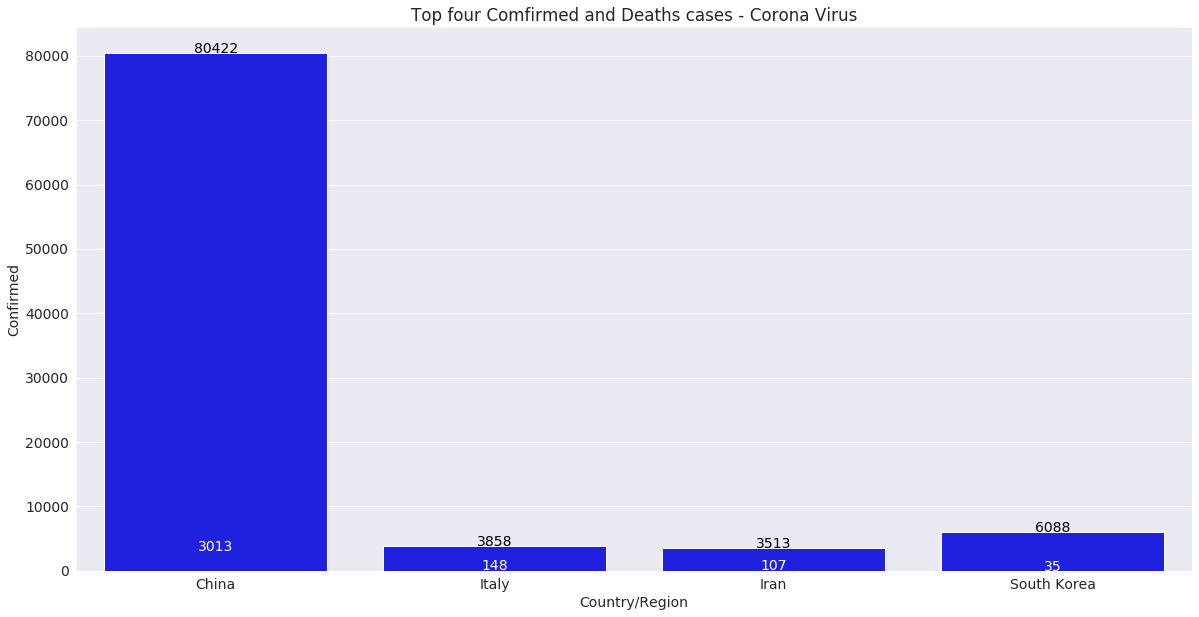

In [100]:
sns.set_style("darkgrid")
dfglobal = pd.read_csv("today.csv",  skiprows = range(5,200))
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "Arial Bold"
plt.rcParams['font.size'] = "14"

g =sns.barplot(x='Country/Region',y='Deaths',color='b',data=dfglobal)
for index, row in dfglobal.iterrows():
    g.text(row.name,row.Deaths, round(row.Deaths,5), color='w', ha="center")
    
#plt.title('Top four Comfirmed and Deaths By Corona Virus')

g =sns.barplot(x='Country/Region',y='Confirmed',color='b', data=dfglobal)
for index, row in dfglobal.iterrows():
    g.text(row.name,row.Confirmed, round(row.Confirmed,2), color='black', ha="center")
plt.title('Top four Comfirmed and Deaths cases - Corona Virus')


Text(0.5, 1.0, 'Global Comfirmed and Deaths cases - Corona Virus')

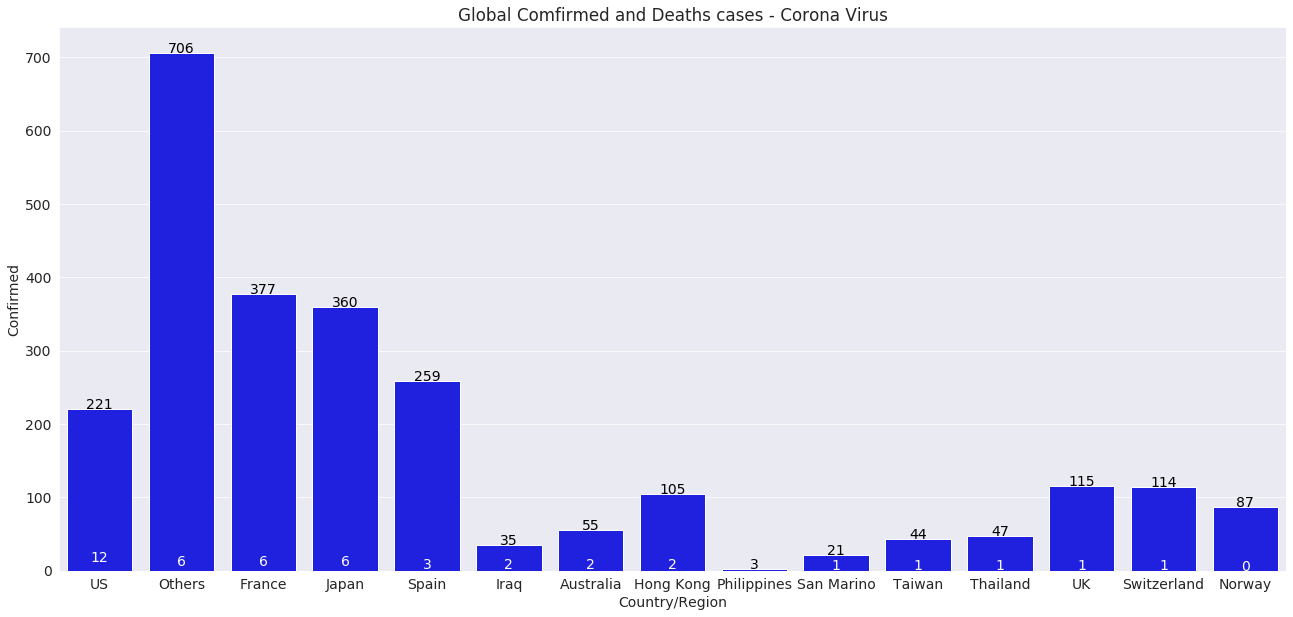

In [99]:
sns.set_style("darkgrid")
nbr_rows_to_skip = range(1,5)
nbr_rows_to_read = 15 
plt.rcParams['figure.figsize'] = (22.0, 10.0)
plt.rcParams['font.family'] = "Arial Bold"
plt.rcParams['font.size'] = "14"

dfglobal = pd.read_csv("today.csv",  nrows=nbr_rows_to_read, skiprows=nbr_rows_to_skip)
g =sns.barplot(x='Country/Region',y='Deaths',color='b',data=dfglobal)
for index, row in dfglobal.iterrows():
    g.text(row.name,row.Deaths, round(row.Deaths,5), color='w', ha="center")
    
#plt.title('Top four Comfirmed and Deaths By Corona Virus')

g =sns.barplot(x='Country/Region',y='Confirmed',color='b', data=dfglobal)
for index, row in dfglobal.iterrows():
    g.text(row.name,row.Confirmed, round(row.Confirmed,2), color='black', ha="center")
plt.title('Global Comfirmed and Deaths cases - Corona Virus')